In [1]:
import pandas as pd


df_13 = pd.read_csv("data/apt-price-13.csv", encoding = "cp949") # 13 ~ 15 평당
df_19 = pd.read_csv("data/apt-price-19.csv", encoding = "cp949") # 19 제곱미터당

In [2]:
df_19.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [3]:
df_13.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [4]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [5]:
df_19["분양가격(평)"] = pd.to_numeric(df_19["분양가격(㎡)"], errors = "coerce") * 3.3
df_19.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격(평)
0,서울,전체,2015,10,5841,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,19400.7


In [6]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격(평)  3957 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 203.3+ KB


In [7]:
df_19["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [8]:
df_19["전용면적"] = df_19["규모구분"].str.replace("전용면적", "").str.replace("초과", "~")\
                                    .str.replace("이하", "").str.replace(" ", "")
df_19

,지역명,규모구분,연도,월,분양가격(㎡),분양가격(평),전용면적
0,서울,전체,2015,10,5841,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,19410.6,60㎡~85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,18879.3,85㎡~102㎡
4,서울,전용면적 102㎡초과,2015,10,5879,19400.7,102㎡~
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,12810.6,전체
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,60㎡
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,12863.4,60㎡~85㎡
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,85㎡~102㎡


In [9]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격(평)  3957 non-null   float64
 6   전용면적     4335 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 237.2+ KB


In [10]:
df_19.drop(["규모구분", "분양가격(㎡)"], axis = 1, inplace = True)
df_19

,지역명,연도,월,분양가격(평),전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
4330,제주,2019,12,12810.6,전체
4331,제주,2019,12,NaN,60㎡
4332,제주,2019,12,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,85㎡~102㎡


In [11]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   연도       4335 non-null   int64  
 2   월        4335 non-null   int64  
 3   분양가격(평)  3957 non-null   float64
 4   전용면적     4335 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 169.5+ KB


In [12]:
df_19.dropna(axis = 0, inplace = True)
df_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3957 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      3957 non-null   object 
 1   연도       3957 non-null   int64  
 2   월        3957 non-null   int64  
 3   분양가격(평)  3957 non-null   float64
 4   전용면적     3957 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 185.5+ KB


In [13]:
df_19.groupby(["전용면적", "지역명"])["분양가격(평)"].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.380000,14771.790,10358.363265,9157.302000,11041.532432,13087.338000,14876.871429,13208.250,23446.038,10106.976000,9974.448000,14362.030435,8168.4900,8193.57000,10522.787234,8689.169388,8195.352
60㎡,7567.098000,13251.744,8689.175000,7883.172000,9430.666667,11992.068000,9176.475000,11353.782,23212.794,9323.927027,9202.106897,11241.318000,7210.1700,7609.93200,14022.221053,7911.156000,7103.118
60㎡~85㎡,7485.588000,12523.566,8618.676000,8061.372000,9910.692000,11778.690000,9711.372000,11864.820,22786.830,9775.458000,10502.531707,11384.406000,7269.2400,7271.35200,10621.314000,7818.954000,7264.488
85㎡~102㎡,8749.557143,13677.774,10017.612000,8773.814634,9296.100000,11140.642857,9037.430769,12072.588,25943.874,9847.926000,8861.007692,11527.560000,7908.8625,8275.78125,10709.082353,9120.045000,8391.306
전체,7477.536000,12559.602,8658.672000,8078.532000,9903.630000,11771.298000,9786.018000,11936.166,22610.346,9805.422000,10492.712195,11257.026000,7283.5620,7292.60400,10784.994000,7815.324000,7219.014


In [14]:
df_19.pivot_table(index = "전용면적", columns = "지역명", values = "분양가격(평)", aggfunc = "mean")

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.380000,14771.790,10358.363265,9157.302000,11041.532432,13087.338000,14876.871429,13208.250,23446.038,10106.976000,9974.448000,14362.030435,8168.4900,8193.57000,10522.787234,8689.169388,8195.352
60㎡,7567.098000,13251.744,8689.175000,7883.172000,9430.666667,11992.068000,9176.475000,11353.782,23212.794,9323.927027,9202.106897,11241.318000,7210.1700,7609.93200,14022.221053,7911.156000,7103.118
60㎡~85㎡,7485.588000,12523.566,8618.676000,8061.372000,9910.692000,11778.690000,9711.372000,11864.820,22786.830,9775.458000,10502.531707,11384.406000,7269.2400,7271.35200,10621.314000,7818.954000,7264.488
85㎡~102㎡,8749.557143,13677.774,10017.612000,8773.814634,9296.100000,11140.642857,9037.430769,12072.588,25943.874,9847.926000,8861.007692,11527.560000,7908.8625,8275.78125,10709.082353,9120.045000,8391.306
전체,7477.536000,12559.602,8658.672000,8078.532000,9903.630000,11771.298000,9786.018000,11936.166,22610.346,9805.422000,10492.712195,11257.026000,7283.5620,7292.60400,10784.994000,7815.324000,7219.014


In [15]:
df_19.pivot_table(index = ["전용면적", "연도"], columns = "지역명", values = "분양가격(평)", aggfunc = "mean")

지역명                   강원         경기         경남         경북            광주  \
전용면적     연도                                                               
102㎡~    2015   7164.300  12379.400   9983.600   7658.200           NaN   
         2016   7589.725  13135.650   8910.550   8074.825  11113.666667   
         2017   7767.900  13650.900   9236.700   8956.200  10658.100000   
         2018   8770.300  15270.750   9736.650   9441.850   8622.166667   
         2019   9359.075  17534.550  13839.900  10514.350  14209.387500   
60㎡      2015   7557.000  10447.800   7390.900   7251.200   7588.900000   
         2016   7043.850  11744.150   7990.950   7213.250   8354.225000   
         2017   7088.700  12381.000   8499.000   7900.200   8559.100000   
         2018   7692.850  14396.525   9265.575   8263.750   9547.725000   
         2019   8405.650  15113.725   9434.040   8314.900  11286.275000   
60㎡~85㎡  2015   7257.800  10730.500   7651.600   7166.500   8109.200000   
         2016   7092.525  11235.950   7848.775   7396.400   8919.075000   
         2017   7114.800  11746.200   8071.800   7770.600   9452.400000   
         2018   7668.375  13157.375   8939.975   8477.975   9856.000000   
         2019   8092.700  14338.225   9810.350   8800.000  11827.475000   
85㎡~102㎡ 2015   6801.300  11369.600   9684.400   8074.000           NaN   
         2016   6906.075  11089.100   9885.425   8721.900   9134.400000   
         2017   7269.600  11896.800  10006.500   9052.230   9441.630000   
         2018   9284.000  15281.475   9676.700   8783.775           NaN   
         2019  10673.300  16872.350  10584.200   8765.350           NaN   
전체       2015   7159.900  10377.400   7585.600   7170.900   8052.000000   
         2016   7011.125  11220.000   7847.950   7360.650   8898.725000   
         2017   7126.800  11850.000   8119.800   7794.900   9463.500000   
         2018   7680.750  13185.975   9019.450   8505.200   9855.725000   
         2019   8141.650  14468.850   9870.850   8856.650  11822.800000   

지역명                      대구            대전         부산         서울         세종  \
전용면적     연도                                                                  
102㎡~    2015   8892.400000           NaN  12075.800  20879.100   9012.300   
         2016  10550.100000  14282.400000  12609.575  21549.000   8827.500   
         2017  15087.300000  14282.400000  12633.000  22158.300   9120.900   
         2018  12845.525000  16094.100000  13181.575  23282.600  10475.025   
         2019  15081.825000  15065.600000  14644.025  27328.675  12195.975   
60㎡      2015   9238.900000   8530.500000   9771.300  20122.300   8519.500   
         2016  10930.425000   8735.925000   9916.225  21744.250   8877.825   
         2017  11851.800000   9253.200000  10848.600  21897.000   9155.850   
         2018  12140.700000   8282.400000  12385.450  23395.075  10111.200   
         2019  13721.950000  11492.957143  12618.375  26477.825  10111.200   
60㎡~85㎡  2015   9320.300000   8012.400000   9974.800  19593.200   8798.900   
         2016  10371.625000   8431.775000  10213.775  20788.075   8922.375   
         2017  11463.000000   8921.100000  11650.800  20634.600   9058.200   
         2018  12079.375000  10180.225000  12926.100  22756.250  10376.025   
         2019  13789.050000  11671.275000  13123.275  27587.450  10929.600   
85㎡~102㎡ 2015   8410.600000   8121.300000   9758.100  21258.600   8743.900   
         2016   9247.975000   8350.650000  10548.175  24022.350   8800.825   
         2017  10316.350000   9070.800000  11093.100  23089.500   9194.400   
         2018  11360.066667  10121.100000  12958.825  23687.950  10327.900   
         2019  13963.400000           NaN  14187.250  33909.150  11290.125   
전체       2015   9232.300000   8098.200000  10307.000  19725.200   8750.500   
         2016  10310.025000   8501.625000  10429.925  20663.500   8860.500   
         2017  11455.800000   9044.700000  11577.900  21375.900   9135.300   
         2018  12075.800

<AxesSubplot:xlabel='지역명'>

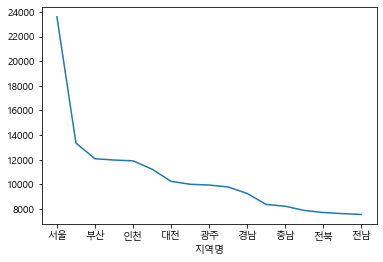

In [16]:
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic") # for window
# plt.rc("font", family = "Apple Gothic") # for Mac

df_19_g = df_19.groupby(["지역명"])["분양가격(평)"].mean().sort_values(ascending = False)

df_19_g.plot()

<AxesSubplot:xlabel='지역명'>

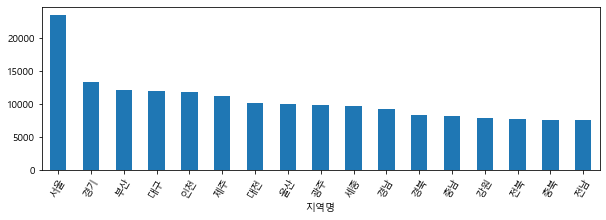

In [17]:
df_19_g.plot.bar(rot = 60, figsize = (10, 3)) # rot for rotation of tick

<AxesSubplot:xlabel='연도'>

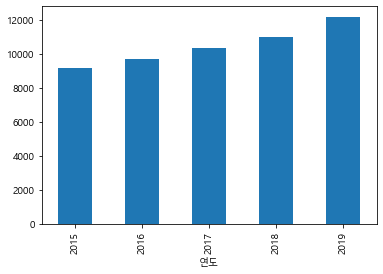

In [18]:
df_19.groupby(["연도"])["분양가격(평)"].mean().plot.bar()

<AxesSubplot:xlabel='전용면적'>

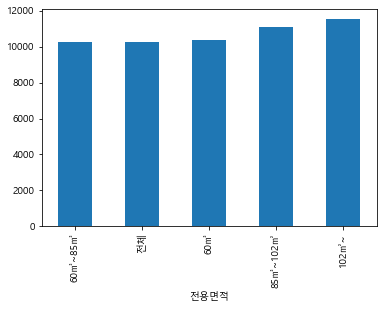

In [19]:
df_19.groupby(["전용면적"])["분양가격(평)"].mean().sort_values(ascending = True).plot.bar()

In [20]:
df_19.pivot_table(index = "월", columns = "연도", values = "분양가격(평)")

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


<AxesSubplot:xlabel='월'>

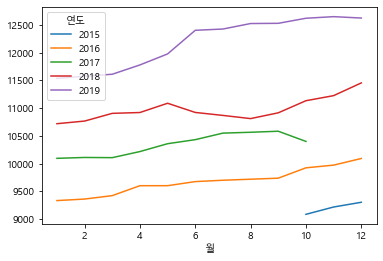

In [21]:
df_19.pivot_table(index = "월", columns = "연도", values = "분양가격(평)").plot()

<AxesSubplot:>

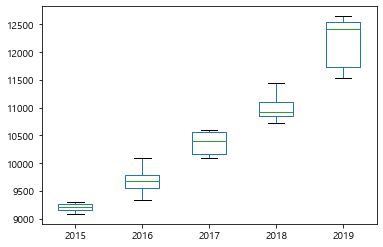

In [22]:
df_19.pivot_table(index = "월", columns = "연도", values = "분양가격(평)").plot.box()

In [23]:
df_19.pivot_table(index = "월", columns = ["연도", "전용면적"], values = "분양가격(평)")

연도       2015                                                            2016  \
전용면적    102㎡~         60㎡      60㎡~85㎡    85㎡~102㎡           전체         102㎡~   
월                                                                               
1         NaN         NaN          NaN         NaN          NaN   9915.840000   
2         NaN         NaN          NaN         NaN          NaN   9861.060000   
3         NaN         NaN          NaN         NaN          NaN   9952.092857   
4         NaN         NaN          NaN         NaN          NaN  10282.181250   
5         NaN         NaN          NaN         NaN          NaN  10177.200000   
6         NaN         NaN          NaN         NaN          NaN  10181.118750   
7         NaN         NaN          NaN         NaN          NaN  10225.050000   
8         NaN         NaN          NaN         NaN          NaN  10355.193750   
9         NaN         NaN          NaN         NaN          NaN  10361.175000   
10    9631.82  8794.91250  8831.964706  9416.96250  8823.229412  10791.582353   
11    9932.78  8903.60625  8875.641176  9586.50000  8879.329412  11061.405882   
12    9947.08  9156.05625  8967.847059  9552.05625  8976.582353  11261.929412   

연도                                                         ...          2018  \
전용면적          60㎡      60㎡~85㎡      85㎡~102㎡           전체  ...         102㎡~   
월                                                          ...                 
1     9195.243750  9035.205882   9554.118750  9042.970588  ...  11220.220000   
2     9228.243750  9033.070588   9725.980000  9052.676471  ...  11243.100000   
3     9218.756250  9059.276471  10006.778571  9063.741176  ...  11320.320000   
4     9260.382353  9173.805882  10230.000000  9177.494118  ...  11125.840000   
5     9343.270588  9210.105882  10161.800000  9219.229412  ...  11536.800000   
6     9302.117647  9340.164706  10349.900000  9315.900000  ...  11101.907143   
7     9310.076471  9368.311765  10377.400000  9332.400000  ...  11079.750000   
8     9290.664706  9380.152941  10315.800000  9360.935294  ...  10994.185714   
9     9449.841176  9338.417647  10295.560000  9345.600000  ...  11529.540000   
10    9651.529412  9554.664706  10082.664706  9540.688235  ...  11827.860000   
11    9673.852941  9498.952941  10147.912500  9491.964706  ...  12028.940000   
12    9829.923529  9559.711765  10245.881250  9572.911765  ...  12261.040000   

연도                                                                  2019  \
전용면적          60㎡       60㎡~85㎡      85㎡~102㎡            전체        102㎡~   
월                                                                          
1     10839.40000  10160.505882  11286.000000  10362.776471  12322.64000   
2     10852.16000  10281.052941  11292.600000  10416.158824  12398.32000   
3     10970.74000  10430.717647  11505.600000  10568.347059  12491.38000   
4     11002.20000  10496.523529  11575.575000  10625.029412  12980.22000   
5     11027.98125  10641.141176  11727.100000  10741.888235  13371.80625   
6     11038.50000  10618.429412  11340.069231  10647.741176  13674.32000   
7     10628.20000  10617.264706  11624.376923  10579.217647  13533.91875   
8     10609.94000  10604.841176  11440.592308  10562.911765  13702.01250   
9     10539.54000  10813.905882  10983.814286  10749.652941  13854.01875   
10    10679.02000  10921.447059  11488.950000  10840.111765  13801.01250   
11    10827.91875  10986.476471  11495.078571  10904.364706  13873.40625   
12    11082.72000  11271.562500  11554.714286  11138.943750  13832.06000   

연도                                                            
전용면적           60㎡       60㎡~85㎡      85㎡~102㎡            전체  
월                                                             
1     11130.900000  11375.100000  11640.514286  11245.575000  
2     11190.520000  11394.075000  11667.150000  11262.900000  
3     11161.920000  11456.156250  11644.050000  11328.281250  
4     11243.807143  11505.037500  11777.464286  11391.187500  
5

<AxesSubplot:>

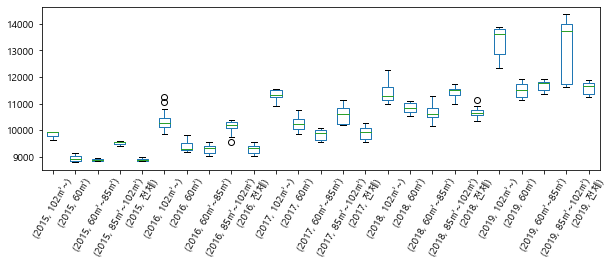

In [24]:
df_19.pivot_table(index = "월", columns = ["연도", "전용면적"], values = "분양가격(평)").plot.box(figsize = (10,3), rot = 60)

In [25]:
df_19.pivot_table(index = "연도", columns = "지역명", values = "분양가격(평)") # default aggfunc = "mean"

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.94,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800
2016,7162.903846,11684.97,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335
2017,7273.560000,12304.98,8786.760000,8280.800000,9613.977551,12206.700000,9957.158491,11560.680,21831.060,9132.505556,10666.935714,11640.600000,7372.920000,7398.973585,12566.730000,8198.422222,7473.120
2018,8219.255000,14258.42,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295
2019,8934.475000,15665.54,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875


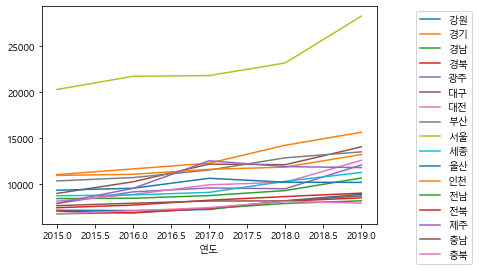

In [26]:
df_19.pivot_table(index = "연도", columns = "지역명", values = "분양가격(평)").plot()

plt.legend(bbox_to_anchor=(1.3, 1))